In [1]:
import pandas as pd
import numpy as np
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

root_dir = '/oak/stanford/groups/horence/rob/isoform_localizations/'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [2]:
cells = pd.read_csv('../processed_data/segmented_cell_shapes.csv')

In [3]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')

In [35]:
sub_cells = cells.sample(1000)
sub_spots = spots[spots['cell_id'].isin(sub_cells['cell_id'])]

import importlib
importlib.reload(spatial_utils)
x = spatial_utils.spatial_metric_centrality(sub_spots, sub_cells)
x

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,100075490862671191776174180449505376841,Adra1b,51,2,centrality,3.969455,1.302674,-0.016687,1.342837
1,100075490862671191776174180449505376841,Aqp4,51,2,centrality,3.377376,0.747133,0.243224,2.789700
2,100075490862671191776174180449505376841,Cldn5,51,3,centrality,3.146265,0.530285,0.142526,0.676519
3,100075490862671191776174180449505376841,Cobll1,51,1,centrality,4.369673,1.678193,-0.028316,0.813812
4,100075490862671191776174180449505376841,Col15a1,51,1,centrality,2.116389,-0.436035,-0.388709,0.774541
...,...,...,...,...,...,...,...,...,...
40106,99801101642570329498499289173375574404,Trp53i11,563,8,centrality,6.531593,-0.031778,0.100791,0.475196
40107,99801101642570329498499289173375574404,Tshz2,563,5,centrality,7.611056,0.382863,-0.008884,0.608341
40108,99801101642570329498499289173375574404,Unc13c,563,1,centrality,7.081220,0.179344,0.017322,1.016165
40109,99801101642570329498499289173375574404,Vtn,563,18,centrality,6.681901,0.025958,0.052720,0.701287


In [37]:
centrality_df = spatial_utils.spatial_metric_centrality(spots, cells)
centrality_df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,10000143038275111136124942858811168393,Adra1b,161,1,centrality,2.779945,-0.844050,0.081712,2.000988
1,10000143038275111136124942858811168393,Aqp4,161,1,centrality,3.808437,-0.009979,0.227370,3.569199
2,10000143038275111136124942858811168393,Bcl11b,161,1,centrality,5.658580,1.490423,0.069374,12.306399
3,10000143038275111136124942858811168393,Brinp3,161,1,centrality,4.015005,0.157541,0.015592,0.713035
4,10000143038275111136124942858811168393,Cdh20,161,3,centrality,3.606702,-0.173579,-0.013992,0.771666


In [38]:
centrality_df.shape

(14615935, 9)

In [39]:
centrality_df.to_csv('../sbatch_scripts/20210113_centrality.csv',index=False)

In [40]:
per_gene = centrality_df.drop_duplicates(['target_molecule_name'])
per_gene.shape

(252, 9)

In [41]:
print('ello govenmor')

ello govenmor


In [42]:
per_gene['gene_var_cell_zscore'].max()

597.4618618273706

In [43]:
per_gene[per_gene['gene_var_cell_zscore'] == per_gene['gene_var_cell_zscore'].max()]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
92,100013893144618144270850756017896167367,Iqgap2,219,7,centrality,3.855501,0.118323,-0.080675,597.461862


In [45]:
centrality_df[
    centrality_df['cell_zscore'] == centrality_df['cell_zscore'].max()
]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
12873514,6321848996835715299413902379125703533,Igfbp5,3,2,centrality,0.375098,7764.207871,0.224053,443.086638


In [46]:
#Filtering to cells with at least 50 total reads
centrality_df = centrality_df[centrality_df['num_cell_spots'].gt(50)]

centrality_df['gene_mean_cell_zscore'] = centrality_df.groupby('target_molecule_name')['cell_zscore'].transform('mean')
centrality_df['gene_var_cell_zscore'] = centrality_df.groupby('target_molecule_name')['cell_zscore'].transform('std')**2

centrality_df.shape


(14130483, 9)

In [66]:
centrality_df['gene_mean_cell_zscore'].min()

-0.5742673041415522

In [65]:
centrality_df.groupby('target_molecule_name')['cell_zscore'].mean().min()

-0.5742673041415522

In [48]:
centrality_df[
    centrality_df['cell_zscore'] == centrality_df['cell_zscore'].max()
]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
5621547,217403282246271054892382559600519193660,Col15a1,53,1,centrality,2.142691,10.471902,-0.437627,0.78702


In [50]:
plot_utils.plot_spot_cells?

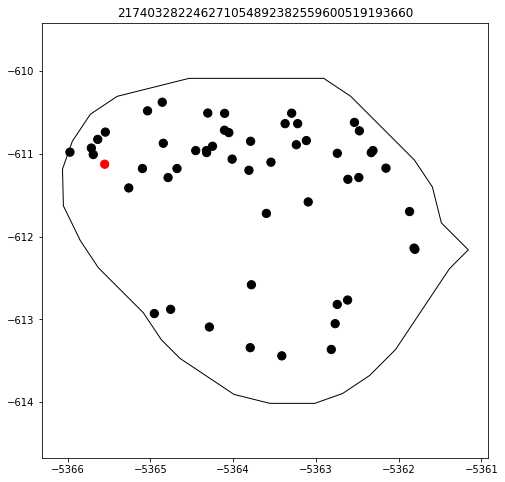

In [51]:
plot_utils.plot_spot_cells(
    spots,
    cells[cells['cell_id'].eq('217403282246271054892382559600519193660')],
    spot_colors={'Col15a1':'r'},
)
plt.show()
plt.close()

In [52]:
per_gene = centrality_df.drop_duplicates(['target_molecule_name'])

In [77]:
per_gene[per_gene['target_molecule_name'].str.contains('T')]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
36,10000143038275111136124942858811168393,Tenm3,161,3,centrality,2.423290,-1.133285,0.093532,0.525266
37,10000143038275111136124942858811168393,Timp3,161,4,centrality,2.058390,-1.429206,0.185161,0.732709
38,10000143038275111136124942858811168393,Tox,161,2,centrality,4.757162,0.759404,0.051040,0.611851
64,100007228202835962319771548915451072492,Tshz2,79,1,centrality,6.203632,0.944404,0.003991,0.851018
124,100013893144618144270850756017896167367,Trpc4,219,2,centrality,4.010837,0.297002,-0.125377,0.685621
157,100017533667894826939857215877082515137,Tmtc2,75,1,centrality,5.264575,1.951078,-0.057543,0.789045
249,100019180101435853096549957382098546223,Teddm3,292,1,centrality,5.145086,2.197946,-0.197367,0.872002
250,100019180101435853096549957382098546223,Tmem163,292,6,centrality,4.204633,1.062903,-0.005201,0.736832
305,100019614084014214413331344619872059390,Thsd7a,91,1,centrality,3.443454,0.434062,0.044955,0.636309
306,100019614084014214413331344619872059390,Trp53i11,91,1,centrality,3.601959,0.571839,0.117503,0.526063


In [73]:
per_gene['gene_var_cell_zscore'].max()

0.9694584309747966

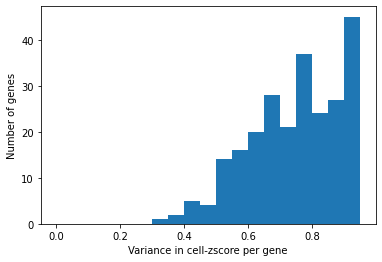

In [72]:
per_gene['gene_var_cell_zscore'].plot.hist(bins=np.arange(0,1,0.05))
plt.xlabel('Variance in cell-zscore per gene')
plt.ylabel('Number of genes')
plt.show()
plt.close()

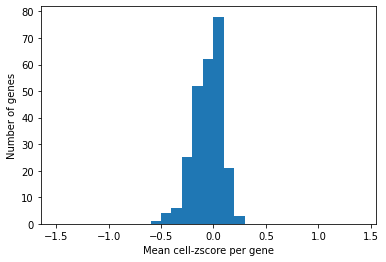

In [70]:
per_gene['gene_mean_cell_zscore'].plot.hist(bins=np.arange(-1.5,1.5,0.1))
plt.xlabel('Mean cell-zscore per gene')
plt.ylabel('Number of genes')
plt.show()
plt.close()

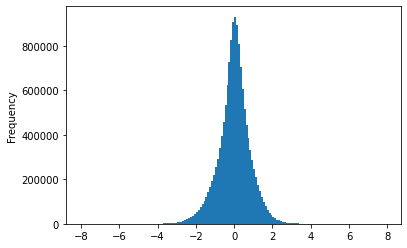

In [62]:
centrality_df['cell_zscore'].plot.hist(bins=np.arange(-8,8,0.1))
plt.show()
plt.close()

In [80]:
(
    centrality_df[
        centrality_df['target_molecule_name'].eq('Tmem163')
    ]
    .drop_duplicates('cell_id')
    .sort_values('cell_zscore', ascending=False)
)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
4470428,193243650945162872311854303357727142493,Tmem163,51,1,centrality,2.327578,6.655061,-0.005201,0.736832
10915059,328451221414802258929965476783049424878,Tmem163,58,1,centrality,2.720014,5.093961,-0.005201,0.736832
500749,110448957993160674495602129212722532674,Tmem163,54,1,centrality,2.316159,4.556951,-0.005201,0.736832
2635865,154856724690756193043472546339234441630,Tmem163,57,1,centrality,2.392195,4.536977,-0.005201,0.736832
1047666,121919529574721685553832013389649901660,Tmem163,126,1,centrality,3.073631,4.426158,-0.005201,0.736832
...,...,...,...,...,...,...,...,...,...
5023505,204893414822374419811947182894384821381,Tmem163,120,1,centrality,0.255480,-5.021515,-0.005201,0.736832
10574490,32108318643247492299008468790596221145,Tmem163,80,1,centrality,0.636972,-5.078311,-0.005201,0.736832
14206588,91457339913808099363606886490982993596,Tmem163,56,4,centrality,0.404400,-5.640972,-0.005201,0.736832
836259,117574836265304252053554447289260644958,Tmem163,90,1,centrality,0.307673,-5.762622,-0.005201,0.736832
